# Install Libraries

In [1]:
#!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from urllib.request import urlopen
from bs4 import BeautifulSoup


# Test Geolocator

In [2]:


#address = 'Charlotte, NC'
address = 'One Paul Brown Stadium, Cincinnati, OH 45202'
geolocator = Nominatim(user_agent="stad_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates are {}, {},{}.'.format(latitude, longitude, location))



The geograpical coordinates are 39.0954645, -84.5160488350198,Paul Brown Stadium, West Freedom Way, Cincinnati, Hamilton County, Ohio, 45202-2209, United States of America.


# Get Stadium List

In [3]:

url='https://raw.githubusercontent.com/ptdanner/Coursera_Capstone/master/NFLStadiums2.csv'
nfl_df=pd.read_csv(url,error_bad_lines=False)
nfl_df

,Team,Division,Stadium,Capacity,WinPerc,Address
0,Arizona Cardinals,NFC West,Sundevil Football Stadium,"63,400",34.03%,500 E Veterans Way: Tempe: AZ 85287
1,Atlanta Falcons,NFC South,Mercedes-Benz Stadium,"71,000",49.57%,409 Nelson St SW: Atlanta: GA 30313
2,Baltimore Ravens,AFC North,M&T Bank Stadium,"71,008",65.77%,1101 Russell Street: Baltimore: MD 21230
3,Buffalo Bills,AFC East,Bills Stadium,"71,608",49.73%,One Bills Drive: Orchard Park: NY 14127
4,Carolina Panthers,NFC South,Bank of America Stadium,"75,523",46.57%,800 South Mint Street: Charlotte: NC 28202
5,Chicago Bears,NFC North,Soldier Field,"61,500",50.60%,1005 S 4th St: Minneapolis: MN 55415
6,Cincinnati Bengals,AFC North,Paul Brown Stadium,"65,515",31.27%,Cincinnati: OH 45202
7,Cleveland Browns,AFC North,FirstEnergy Stadium,"67,895",28.07%,Cleveland: OH 44114
8,Dallas Cowboys,NFC East,AT&T Stadium,"80,000",55.77%,One AT&T Way: Arlington: TX 76011
9,Denver Broncos,AFC West,Empower Field at Mile High,"76,125",37.50%,1701 Bryant St: Denver: CO 80204


# Ckean Stadium List Address Column

In [4]:
nfl_df['Address'] = nfl_df['Address'].str.replace(':', ',')
nfl_df.head(10)

,Team,Division,Stadium,Capacity,WinPerc,Address
0,Arizona Cardinals,NFC West,Sundevil Football Stadium,"63,400",34.03%,"500 E Veterans Way, Tempe, AZ 85287"
1,Atlanta Falcons,NFC South,Mercedes-Benz Stadium,"71,000",49.57%,"409 Nelson St SW, Atlanta, GA 30313"
2,Baltimore Ravens,AFC North,M&T Bank Stadium,"71,008",65.77%,"1101 Russell Street, Baltimore, MD 21230"
3,Buffalo Bills,AFC East,Bills Stadium,"71,608",49.73%,"One Bills Drive, Orchard Park, NY 14127"
4,Carolina Panthers,NFC South,Bank of America Stadium,"75,523",46.57%,"800 South Mint Street, Charlotte, NC 28202"
5,Chicago Bears,NFC North,Soldier Field,"61,500",50.60%,"1005 S 4th St, Minneapolis, MN 55415"
6,Cincinnati Bengals,AFC North,Paul Brown Stadium,"65,515",31.27%,"Cincinnati, OH 45202"
7,Cleveland Browns,AFC North,FirstEnergy Stadium,"67,895",28.07%,"Cleveland, OH 44114"
8,Dallas Cowboys,NFC East,AT&T Stadium,"80,000",55.77%,"One AT&T Way, Arlington, TX 76011"
9,Denver Broncos,AFC West,Empower Field at Mile High,"76,125",37.50%,"1701 Bryant St, Denver, CO 80204"


# Get Shape of Stadium List

In [5]:
count_row = nfl_df.shape[0]
print(count_row)

32


# Get Latitude and Longitude for Stadiums

In [6]:
# Find longitude and latitude values for every Stadium Postal address. We will be brave enough to use the Geocoder package...

geolocator = Nominatim(user_agent="stad_explorer")

for i in range(len(nfl_df)):
    address = nfl_df.loc[i,'Address']
    try:
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
        nfl_df.loc[i,'latitude']=location.latitude
        nfl_df.loc[i,'longitude']=location.longitude
        print('The geograpical coordinates are {}, {},{}.'.format(location, latitude, longitude))

    except:
        print("Exception on: {} ".format(address)) #Look for Addresses with missing coordinates
        pass
        


The geograpical coordinates are Sun Devil Stadium, 500, East Veterans Way, Tempe, Maricopa County, Arizona, 8587, United States of America, 33.42655155,-111.93327690688318.
The geograpical coordinates are Nelson Street Southwest, Castleberry Hill, Atlanta, Georgia, 30313, United States of America, 33.751282,-84.399564.
The geograpical coordinates are M&T Bank Stadium, 1101, Russell Street, Ridgely's Delight, Baltimore, Maryland, 21230, United States of America, 39.2779664,-76.62380930835468.
The geograpical coordinates are Bills Drive, Orchard Park, Erie County, New York, 14127, United States of America, 42.7713413,-78.7873628.
The geograpical coordinates are Bank of America Stadium, 800, South Mint Street, Third Ward, 3rd Ward, Charlotte, Mecklenburg County, North Carolina, 28202, United States of America, 35.2258352,-80.8517716961349.
The geograpical coordinates are South 4th Street, Minneapolis, Hennepin County, Minnesota, 55415, United States of America, 44.9742421,-93.2557798.
The

In [7]:
nfl_df

,Team,Division,Stadium,Capacity,WinPerc,Address,latitude,longitude
0,Arizona Cardinals,NFC West,Sundevil Football Stadium,"63,400",34.03%,"500 E Veterans Way, Tempe, AZ 85287",33.426552,-111.933277
1,Atlanta Falcons,NFC South,Mercedes-Benz Stadium,"71,000",49.57%,"409 Nelson St SW, Atlanta, GA 30313",33.751282,-84.399564
2,Baltimore Ravens,AFC North,M&T Bank Stadium,"71,008",65.77%,"1101 Russell Street, Baltimore, MD 21230",39.277966,-76.623809
3,Buffalo Bills,AFC East,Bills Stadium,"71,608",49.73%,"One Bills Drive, Orchard Park, NY 14127",42.771341,-78.787363
4,Carolina Panthers,NFC South,Bank of America Stadium,"75,523",46.57%,"800 South Mint Street, Charlotte, NC 28202",35.225835,-80.851772
5,Chicago Bears,NFC North,Soldier Field,"61,500",50.60%,"1005 S 4th St, Minneapolis, MN 55415",44.974242,-93.255780
6,Cincinnati Bengals,AFC North,Paul Brown Stadium,"65,515",31.27%,"Cincinnati, OH 45202",39.101454,-84.512460
7,Cleveland Browns,AFC North,FirstEnergy Stadium,"67,895",28.07%,"Cleveland, OH 44114",41.505161,-81.693445
8,Dallas Cowboys,NFC East,AT&T Stadium,"80,000",55.77%,"One AT&T Way, Arlington, TX 76011",32.752953,-97.087837
9,Denver Broncos,AFC West,Empower Field at Mile High,"76,125",37.50%,"1701 Bryant St, Denver, CO 80204",39.743952,-105.019223


In [8]:
#TEST FOR EXCEPTION ADDRESSES DELETE ME LATER
#address = 'Charlotte, NC'
#address = nfl_df['Address'].iloc[1]
address ='302 W 3rd St, Cincinnati, OH 45202'
geolocator = Nominatim(user_agent="stad_explorer")
location = geolocator.geocode(address)
#latitude = location.latitude
#longitude = location.longitude
#print('The geograpical coordinates are {}, {},{}.'.format(latitude, longitude, location))
print('The geograpical coordinates are {}.'.format(location))

The geograpical coordinates are AL Neyer, 302, West 3rd Street, Cincinnati, Hamilton County, Ohio, 45202, United States of America.


In [9]:
import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
#from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

# import folium for map rendering library
!pip install folium
import folium 

print('Libraries imported.')

     |████████████████████████████████| 93 kB 3.3 MB/s  eta 0:00:01
Libraries imported.


# Show Map of all locations

In [10]:
# create map of USA using latitude and longitude values
map_nfl = folium.Map(location=[latitude, longitude], zoom_start=4)

# add markers to map
for lat, lng, team, stadium in zip(nfl_df['latitude'], nfl_df['longitude'], nfl_df['Team'], nfl_df['Stadium']):
    try:
        label = '{}, {}'.format(team, stadium)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(map_nfl)  
    except:
        pass
map_nfl

# Define Foursquare settings

In [11]:
#Define Foursquare Credentials and Version
CLIENT_ID = 'W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS' # your Foursquare ID
CLIENT_SECRET = 'YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS
CLIENT_SECRET:YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK


# Retrieve all Foursquare Categories

In [12]:
#Create URL to retrieve all categories
url = 'https://api.foursquare.com/v2/venues/categories?&client_id={}&client_secret={}&v={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION)
#Send the GET request and examine the results
results_cat = requests.get(url).json()
results_cat

{'meta': {'code': 200, 'requestId': '5fd182eb91d4973d5ed9fb0f'},
 'response': {'categories': [{'id': '4d4b7104d754a06370d81259',
    'name': 'Arts & Entertainment',
    'pluralName': 'Arts & Entertainment',
    'shortName': 'Arts & Entertainment',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_',
     'suffix': '.png'},
    'categories': [{'id': '56aa371be4b08b9a8d5734db',
      'name': 'Amphitheater',
      'pluralName': 'Amphitheaters',
      'shortName': 'Amphitheater',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_',
       'suffix': '.png'},
      'categories': []},
     {'id': '4fceea171983d5d06c3e9823',
      'name': 'Aquarium',
      'pluralName': 'Aquariums',
      'shortName': 'Aquarium',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/aquarium_',
       'suffix': '.png'},
      'categories': []},
     {'id': '4bf58dd8d48988d1e1931735',
      'name': 'A

In [13]:
# assign relevant part of JSON to venues
categories = results_cat['response']['categories']
categories
# tranform categories into a dataframe
dataframe_cat = pd.json_normalize(categories)
dataframe_cat.head()
# filter for only Food
dataframe_cat_food = dataframe_cat[dataframe_cat['name']=='Food']
dataframe_cat_food
categoriestext = dataframe_cat_food.loc[3,'categories']
categoriestext
dataframe_subcat = pd.json_normalize(categoriestext)
dataframe_subcat.shape
categorylist = dataframe_subcat['name'].tolist()

#type(mylist)
categorylist

['Afghan Restaurant',
 'African Restaurant',
 'American Restaurant',
 'Armenian Restaurant',
 'Asian Restaurant',
 'Australian Restaurant',
 'Austrian Restaurant',
 'BBQ Joint',
 'Bagel Shop',
 'Bakery',
 'Bangladeshi Restaurant',
 'Belgian Restaurant',
 'Bistro',
 'Breakfast Spot',
 'Bubble Tea Shop',
 'Buffet',
 'Burger Joint',
 'Cafeteria',
 'Café',
 'Cajun / Creole Restaurant',
 'Caribbean Restaurant',
 'Caucasian Restaurant',
 'Coffee Shop',
 'Comfort Food Restaurant',
 'Creperie',
 'Czech Restaurant',
 'Deli / Bodega',
 'Dessert Shop',
 'Diner',
 'Donut Shop',
 'Dumpling Restaurant',
 'Dutch Restaurant',
 'Eastern European Restaurant',
 'English Restaurant',
 'Falafel Restaurant',
 'Fast Food Restaurant',
 'Fish & Chips Shop',
 'Fondue Restaurant',
 'Food Court',
 'Food Stand',
 'Food Truck',
 'French Restaurant',
 'Fried Chicken Joint',
 'Friterie',
 'Gastropub',
 'German Restaurant',
 'Gluten-free Restaurant',
 'Greek Restaurant',
 'Halal Restaurant',
 'Hawaiian Restaurant',
 '

In [14]:
#DELETEME# function that extracts the categories name and parents
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [15]:
#DELETEME
categories = results_cat['response']['groups'][0]['items']
    
nearby_venues = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

KeyError: 'groups'

In [16]:
nfl_df.loc[1,'Team']
stadium_latitude = nfl_df.loc[1, 'latitude'] # stadium latitude value
stadium_longitude = nfl_df.loc[1, 'longitude'] # stadium longitude value

stadium_name = nfl_df.loc[1, 'Stadium'] # stadium name

print('Latitude and longitude values of {} are {}, {}.'.format(stadium_name, 
                                                               stadium_latitude, 
                                                               stadium_longitude))

Latitude and longitude values of Mercedes-Benz Stadium are 33.751282, -84.399564.


In [17]:
#HERE#####TEST FOR CATEGORY SEARCH
address = '102 North End Ave, New York, NY'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)
search_query = 'Food'
radius = 1000
print(search_query + ' .... OK!')
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url
results = requests.get(url).json()
results
# assign relevant part of JSON to venues
venues = results['response']['venues']
venues
# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

40.7149555 -74.0153365
Food .... OK!


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:20: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,...,location.state,location.country,location.formattedAddress,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,venuePage.id
0,49bc3b0af964a52020541fe3,Whole Foods Market,"[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",v-1607566068,False,270 Greenwich Street,at Warren St,40.715579,-74.011368,"[{'label': 'display', 'lat': 40.71557915542060...",...,NY,United States,"[270 Greenwich Street (at Warren St), New York...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4bbb7d5aafe1b713ac3f2f4b,Food Bank For New York City,"[{'id': '4bf58dd8d48988d124941735', 'name': 'O...",v-1607566068,False,39 Broadway Fl 10,NaN,40.706336,-74.012972,"[{'label': 'display', 'lat': 40.70633552386926...",...,NY,United States,"[39 Broadway Fl 10, New York, NY 10006, United...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4ded108b52b100c01e04d28b,Biryani House Food Truck,"[{'id': '4bf58dd8d48988d1cb941735', 'name': 'F...",v-1607566068,False,140 Broadway,Beaver St Btw Broadway & New St,40.704956,-74.012537,"[{'label': 'display', 'lat': 40.70495624253704...",...,New York,United States,[140 Broadway (Beaver St Btw Broadway & New St...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,51378818e4b079558b0a6a61,Food Cart,"[{'id': '4bf58dd8d48988d1cb941735', 'name': 'F...",v-1607566068,False,Greenwich Street,Barclay Street,40.714182,-74.012413,"[{'label': 'display', 'lat': 40.714182, 'lng':...",...,NY,United States,"[Greenwich Street (Barclay Street), New York, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,56904b22498e43f06a074ac2,Food & Wine Test Kitchen,"[{'id': '4bf58dd8d48988d171941735', 'name': 'E...",v-1607566068,False,225 Liberty St,NaN,40.711888,-74.015212,"[{'label': 'display', 'lat': 40.711888, 'lng':...",...,NY,United States,"[225 Liberty St, New York, NY, United States]",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
####CONTINUE TEST
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories','id'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]
dataframe_filtered

,name,categories,id,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.neighborhood,location.city,location.state,location.country,location.formattedAddress,id
0,Whole Foods Market,"[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",49bc3b0af964a52020541fe3,270 Greenwich Street,at Warren St,40.715579,-74.011368,"[{'label': 'display', 'lat': 40.71557915542060...",341,10007,US,Tribeca,New York,NY,United States,"[270 Greenwich Street (at Warren St), New York...",49bc3b0af964a52020541fe3
1,Food Bank For New York City,"[{'id': '4bf58dd8d48988d124941735', 'name': 'O...",4bbb7d5aafe1b713ac3f2f4b,39 Broadway Fl 10,NaN,40.706336,-74.012972,"[{'label': 'display', 'lat': 40.70633552386926...",980,10006,US,NaN,New York,NY,United States,"[39 Broadway Fl 10, New York, NY 10006, United...",4bbb7d5aafe1b713ac3f2f4b
2,Biryani House Food Truck,"[{'id': '4bf58dd8d48988d1cb941735', 'name': 'F...",4ded108b52b100c01e04d28b,140 Broadway,Beaver St Btw Broadway & New St,40.704956,-74.012537,"[{'label': 'display', 'lat': 40.70495624253704...",1137,NaN,US,Financial District,NaN,New York,United States,[140 Broadway (Beaver St Btw Broadway & New St...,4ded108b52b100c01e04d28b
3,Food Cart,"[{'id': '4bf58dd8d48988d1cb941735', 'name': 'F...",51378818e4b079558b0a6a61,Greenwich Street,Barclay Street,40.714182,-74.012413,"[{'label': 'display', 'lat': 40.714182, 'lng':...",261,NaN,US,NaN,New York,NY,United States,"[Greenwich Street (Barclay Street), New York, ...",51378818e4b079558b0a6a61
4,Food & Wine Test Kitchen,"[{'id': '4bf58dd8d48988d171941735', 'name': 'E...",56904b22498e43f06a074ac2,225 Liberty St,NaN,40.711888,-74.015212,"[{'label': 'display', 'lat': 40.711888, 'lng':...",341,NaN,US,NaN,New York,NY,United States,"[225 Liberty St, New York, NY, United States]",56904b22498e43f06a074ac2
5,Food & Wine Magazine,"[{'id': '4bf58dd8d48988d124941735', 'name': 'O...",56904b7e498eaf25c7535429,225 Liberty St,NaN,40.711875,-74.015287,"[{'label': 'display', 'lat': 40.711875, 'lng':...",342,NaN,US,NaN,New York,NY,United States,"[225 Liberty St, New York, NY, United States]",56904b7e498eaf25c7535429
6,Food Cart,"[{'id': '4bf58dd8d48988d1cb941735', 'name': 'F...",557aa21c498e430a4475bae6,Barclay St,Greenwich St,40.712583,-74.011808,"[{'label': 'display', 'lat': 40.71258340005171...",397,NaN,US,NaN,New York,NY,United States,"[Barclay St (Greenwich St), New York, NY, Unit...",557aa21c498e430a4475bae6
7,Chambers St Halal Food,"[{'id': '56aa371be4b08b9a8d57350b', 'name': 'F...",5af9ba33ba57b4002cc1baa2,NaN,NaN,40.716241,-74.010687,"[{'label': 'display', 'lat': 40.716241, 'lng':...",417,10007,US,NaN,New York,NY,United States,"[New York, NY 10007, United States]",5af9ba33ba57b4002cc1baa2
8,Zak's Halal Food,"[{'id': '4bf58dd8d48988d1cb941735', 'name': 'F...",52b1e86e498ed4267316789b,Liberty Plaza,NaN,40.712357,-74.014264,"[{'label': 'display', 'lat': 40.71235673019370...",303,NaN,US,NaN,New York,NY,United States,"[Liberty Plaza, New York, NY, United States]",52b1e86e498ed4267316789b
9,South Food Truck Court,"[{'id': '4bf58dd8d48988d1cb941735', 'name': 'F...",51e57352498eb9115b270d65,NaN,Liberty,40.711932,-74.015537,"[{'label': 'display', 'lat': 40.711932, 'lng':...",336,NaN,US,NaN,New York,NY,United States,"[Liberty, New York, NY, United States]",51e57352498eb9115b270d65


In [19]:
####CONTINUE TEST

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
#dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,id,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.neighborhood,location.city,location.state,location.country,location.formattedAddress,id
0,Whole Foods Market,Grocery Store,49bc3b0af964a52020541fe3,270 Greenwich Street,at Warren St,40.715579,-74.011368,"[{'label': 'display', 'lat': 40.71557915542060...",341,10007,US,Tribeca,New York,NY,United States,"[270 Greenwich Street (at Warren St), New York...",49bc3b0af964a52020541fe3
1,Food Bank For New York City,Office,4bbb7d5aafe1b713ac3f2f4b,39 Broadway Fl 10,NaN,40.706336,-74.012972,"[{'label': 'display', 'lat': 40.70633552386926...",980,10006,US,NaN,New York,NY,United States,"[39 Broadway Fl 10, New York, NY 10006, United...",4bbb7d5aafe1b713ac3f2f4b
2,Biryani House Food Truck,Food Truck,4ded108b52b100c01e04d28b,140 Broadway,Beaver St Btw Broadway & New St,40.704956,-74.012537,"[{'label': 'display', 'lat': 40.70495624253704...",1137,NaN,US,Financial District,NaN,New York,United States,[140 Broadway (Beaver St Btw Broadway & New St...,4ded108b52b100c01e04d28b
3,Food Cart,Food Truck,51378818e4b079558b0a6a61,Greenwich Street,Barclay Street,40.714182,-74.012413,"[{'label': 'display', 'lat': 40.714182, 'lng':...",261,NaN,US,NaN,New York,NY,United States,"[Greenwich Street (Barclay Street), New York, ...",51378818e4b079558b0a6a61
4,Food & Wine Test Kitchen,Event Space,56904b22498e43f06a074ac2,225 Liberty St,NaN,40.711888,-74.015212,"[{'label': 'display', 'lat': 40.711888, 'lng':...",341,NaN,US,NaN,New York,NY,United States,"[225 Liberty St, New York, NY, United States]",56904b22498e43f06a074ac2
5,Food & Wine Magazine,Office,56904b7e498eaf25c7535429,225 Liberty St,NaN,40.711875,-74.015287,"[{'label': 'display', 'lat': 40.711875, 'lng':...",342,NaN,US,NaN,New York,NY,United States,"[225 Liberty St, New York, NY, United States]",56904b7e498eaf25c7535429
6,Food Cart,Food Truck,557aa21c498e430a4475bae6,Barclay St,Greenwich St,40.712583,-74.011808,"[{'label': 'display', 'lat': 40.71258340005171...",397,NaN,US,NaN,New York,NY,United States,"[Barclay St (Greenwich St), New York, NY, Unit...",557aa21c498e430a4475bae6
7,Chambers St Halal Food,Food Stand,5af9ba33ba57b4002cc1baa2,NaN,NaN,40.716241,-74.010687,"[{'label': 'display', 'lat': 40.716241, 'lng':...",417,10007,US,NaN,New York,NY,United States,"[New York, NY 10007, United States]",5af9ba33ba57b4002cc1baa2
8,Zak's Halal Food,Food Truck,52b1e86e498ed4267316789b,Liberty Plaza,NaN,40.712357,-74.014264,"[{'label': 'display', 'lat': 40.71235673019370...",303,NaN,US,NaN,New York,NY,United States,"[Liberty Plaza, New York, NY, United States]",52b1e86e498ed4267316789b
9,South Food Truck Court,Food Truck,51e57352498eb9115b270d65,NaN,Liberty,40.711932,-74.015537,"[{'label': 'display', 'lat': 40.711932, 'lng':...",336,NaN,US,NaN,New York,NY,United States,"[Liberty, New York, NY, United States]",51e57352498eb9115b270d65


# Retrieve Venues surrounding One Stadium

In [20]:
nfl_df.loc[1,'Team']
stadium_latitude = nfl_df.loc[1, 'latitude'] # stadium latitude value
stadium_longitude = nfl_df.loc[1, 'longitude'] # stadium longitude value

stadium_name = nfl_df.loc[1, 'Stadium'] # stadium name

print('Latitude and longitude values of {} are {}, {}.'.format(stadium_name, 
                                                               stadium_latitude, 
                                                               stadium_longitude))

Latitude and longitude values of Mercedes-Benz Stadium are 33.751282, -84.399564.


In [21]:
#Get the top 100 venues within a radius of 1000 meters.
#First, let's create the GET request URL. Name your URL url.

LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    stadium_latitude, 
    stadium_longitude, 
    radius, 
    LIMIT)
url # display URL

#Send the GET request and examine the results
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5fd18302e1ccea0750d608ae'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Castleberry Hill',
  'headerFullLocation': 'Castleberry Hill, Atlanta',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 84,
  'suggestedBounds': {'ne': {'lat': 33.760282009000015,
    'lng': -84.38875982973471},
   'sw': {'lat': 33.74228199099999, 'lng': -84.41036817026529}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b0dd396f964a520de5023e3',
       'name': 'Wine Shoe',
       'location': {'address': '339 Nelson St SW',
        'lat': 33.75155944634878,
        'lng': -84.39893717875819,
        'labeledLatL

# Put Venues in Dataframe

In [22]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [23]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.id','venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues


,name,id,categories,lat,lng
0,Wine Shoe,4b0dd396f964a520de5023e3,Wine Shop,33.751559,-84.398937
1,Bottle Rocket,4a836c8ff964a5201bfb1fe3,Sushi Restaurant,33.750109,-84.400979
2,ZuCot Gallery,4ac6c860f964a52042b620e3,Art Gallery,33.752463,-84.399011
3,Elliott Street Deli & Pub,49f2218cf964a520f3691fe3,Dive Bar,33.753248,-84.398144
4,Atlanta Movie Tours,4fef03a2e4b05dce3a2f5576,Moving Target,33.751586,-84.398570
...,...,...,...,...,...
79,Fed Ex Office Georgia World Congress Center,4fc8cdd8e4b0681a47e579fa,Paper / Office Supplies Store,33.744176,-84.398324
80,John Hope Community Center,5321c4aa498e0b72057ec5a1,Community Center,33.747533,-84.407100
81,Hidden Treasures,5399f694498e9ff3736baf78,Smoke Shop,33.743988,-84.403767
82,Murrell's At Scholar,4f32872719836c91c7e0942f,Food,33.755150,-84.409019


In [24]:
nearby_food = nearby_venues[nearby_venues['categories'].isin(categorylist)]
#rpt[rpt['STK_ID'].isin(stk_list)]
#nearby_food.reset_index(drop = true)
nearby_food

,name,id,categories,lat,lng
5,No Mas! Cantina,4a4564c1f964a52020a81fe3,Mexican Restaurant,33.749785,-84.400847
11,Old Lady Gang,58d71061ecb67e3da5248c0f,Southern / Soul Food Restaurant,33.749664,-84.399405
12,ADios Cafe,49fedd7df964a520af6f1fe3,Café,33.750037,-84.400994
15,Dat Fire Jerk Chicken,56466157498e954762ce1bda,Caribbean Restaurant,33.748248,-84.404748
18,Fox Bros Bar-B-Q & Brew,5a1afbb2dee7706a7bf38412,BBQ Joint,33.755600,-84.399526
20,Kevin Gillespees’s Gamechangers,59f2768416fa0431168d1084,Restaurant,33.755220,-84.400736
23,Chick-fil-A,596e9b0d419a9e73cd324147,Fast Food Restaurant,33.754853,-84.403203
26,Chick-fil-A,58d4374824ca6a01652379a4,Fast Food Restaurant,33.758782,-84.398699
28,Jamrock Restaurant,4c40e04eaf052d7f16817c79,Caribbean Restaurant,33.751554,-84.391356
33,Murrell's Cafe,531f1c8f498e541864e036de,Buffet,33.754005,-84.409473


In [25]:
nearby_venues.shape

(84, 5)

# Get Venues for All Stadiums

In [26]:

def getNearbyVenues(names, divisions, stadiums, capacities, winpercs, latitudes, longitudes, radius=500, limit=100):
    
    venues_list=[]
    for name, division, stadium, capacity, winperc, lat, lng in zip(names, divisions, stadiums, capacities, winpercs, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)

       # url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
       #     CLIENT_ID, 
       #     CLIENT_SECRET, 
       #     VERSION, 
       #     lat, 
       #     lng, 
       #     radius, 
       #     LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name,
            division,
            stadium,
            capacity,
            winperc,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name'],
            v['venue']['id']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Team',
                  'Divison',
                  'Stadium',
                  'Capacity',
                  'Win Perc',
                  'Stadium Latitude', 
                  'Stadium Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category',
                  'Venue ID']
    
    return(nearby_venues)

In [27]:
#Now write the code to run the above function on each neighborhood and create a new dataframe called toronto_venues.
#Get the top 100 venues within a radius of 1000 meters.
#First, let's create the GET request URL. Name your URL url.

LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
stadium_venues = getNearbyVenues(names=nfl_df['Team'],
                                   divisions=nfl_df['Division'],
                                   stadiums=nfl_df['Stadium'],
                                   capacities=nfl_df['Capacity'],
                                   winpercs=nfl_df['WinPerc'],
                                   latitudes=nfl_df['latitude'],
                                   longitudes=nfl_df['longitude'],
                                   radius=750,
                                   limit = 100
                                  )

Arizona Cardinals
Atlanta Falcons
Baltimore Ravens
Buffalo Bills
Carolina Panthers
Chicago Bears
Cincinnati Bengals
Cleveland Browns
Dallas Cowboys
Denver Broncos
Detroit Lions
Green Bay Packers
Houston Texans
Indianapolis Colts
Jacksonville Jaguars
Kansas City Chiefs
Las Vegas Raiders
Los Angeles Chargers
Los Angeles Rams
Miami Dolphins
Minnesota Vikings
New England Patriots
New Orleans Saints
New York Giants
New York Jets
Philadelphia Eagles
Pittsburgh Steelers
San Francisco 49ers
Seattle Seahawks
Tampa Bay Buccaneers
Tennessee Titans
Washington Redskins


In [28]:
print(stadium_venues.shape)
stadium_venues.head()

(1712, 12)


,Team,Divison,Stadium,Capacity,Win Perc,Stadium Latitude,Stadium Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue ID
0,Arizona Cardinals,NFC West,Sundevil Football Stadium,"63,400",34.03%,33.426552,-111.933277,Sun Devil Stadium,33.426396,-111.932393,College Stadium,4b155040f964a52036b023e3
1,Arizona Cardinals,NFC West,Sundevil Football Stadium,"63,400",34.03%,33.426552,-111.933277,Postino Annex,33.423973,-111.934752,Wine Bar,54174fa7498e3d2a9d8dfaa4
2,Arizona Cardinals,NFC West,Sundevil Football Stadium,"63,400",34.03%,33.426552,-111.933277,"Snooze, an A.M. Eatery",33.423735,-111.934702,Breakfast Spot,5489c1fe498ebda5dea9a9f1
3,Arizona Cardinals,NFC West,Sundevil Football Stadium,"63,400",34.03%,33.426552,-111.933277,The Bicycle Cellar,33.425728,-111.936436,Bike Shop,4c49b8373013a593566720e3
4,Arizona Cardinals,NFC West,Sundevil Football Stadium,"63,400",34.03%,33.426552,-111.933277,"""A"" Mountain (Hayden Butte Preserve)",33.428380,-111.936718,Mountain,4b4a43f2f964a5206a8126e3


In [29]:
nearby_food = stadium_venues[stadium_venues['Venue Category'].isin(categorylist)]
#rpt[rpt['STK_ID'].isin(stk_list)]

nearby_food.reset_index(drop=True, inplace=True)
nearby_food

,Team,Divison,Stadium,Capacity,Win Perc,Stadium Latitude,Stadium Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue ID
0,Arizona Cardinals,NFC West,Sundevil Football Stadium,"63,400",34.03%,33.426552,-111.933277,"Snooze, an A.M. Eatery",33.423735,-111.934702,Breakfast Spot,5489c1fe498ebda5dea9a9f1
1,Arizona Cardinals,NFC West,Sundevil Football Stadium,"63,400",34.03%,33.426552,-111.933277,Shawarma Corner,33.424591,-111.934941,Middle Eastern Restaurant,5b9076a41a29250025ad827a
2,Arizona Cardinals,NFC West,Sundevil Football Stadium,"63,400",34.03%,33.426552,-111.933277,Phoenicia Cafe,33.423498,-111.936854,Mediterranean Restaurant,4a692b83f964a520b5cb1fe3
3,Arizona Cardinals,NFC West,Sundevil Football Stadium,"63,400",34.03%,33.426552,-111.933277,Original ChopShop Co.,33.422225,-111.935875,American Restaurant,51d1e3d4498ea96dd5fc8167
4,Arizona Cardinals,NFC West,Sundevil Football Stadium,"63,400",34.03%,33.426552,-111.933277,The Chuckbox,33.422160,-111.936423,Burger Joint,4bf1d51999d02d7fdd9ec948
...,...,...,...,...,...,...,...,...,...,...,...,...
555,Tennessee Titans,AFC South,Nissan Stadium,"69,143",56.57%,36.165423,-86.773398,Laredo Taco Company,36.166499,-86.766439,Restaurant,5f04ba4e19d98c15b6387910
556,Washington Redskins,NFC East,FedExField,"82,000",35.47%,38.930522,-76.895819,Ledo Pizza,38.932477,-76.900942,Pizza Place,5464f42c498e520ce4df692e
557,Washington Redskins,NFC East,FedExField,"82,000",35.47%,38.930522,-76.895819,KFC,38.931928,-76.902121,Fast Food Restaurant,4c48de50a3ace21e759fd03a
558,Washington Redskins,NFC East,FedExField,"82,000",35.47%,38.930522,-76.895819,NY Chicken & Fish,38.931867,-76.901882,Fast Food Restaurant,4ec27329cc212562ae5ccc75


In [30]:
#import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
#from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

#import requests # library to handle requests
#from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

#Define Foursquare Credentials and Version
#CLIENT_ID = 'W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS' # your Foursquare ID
#CLIENT_SECRET = 'YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK' # your Foursquare Secret
#VERSION = '20180604'


# create URL
url = 'https://api.foursquare.com/v2/venues/5b9076a41a29250025ad827a?&client_id={}&client_secret={}&v={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION)
url # display URL

#Send the GET request and examine the results
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5fd18324cd8c3838dbef0d0c'},
 'response': {'venue': {'id': '5b9076a41a29250025ad827a',
   'name': 'Shawarma Corner',
   'contact': {},
   'location': {'lat': 33.42459075888771,
    'lng': -111.93494126714423,
    'labeledLatLngs': [{'label': 'display',
      'lat': 33.42459075888771,
      'lng': -111.93494126714423}],
    'postalCode': '85281',
    'cc': 'US',
    'city': 'Tempe',
    'state': 'AZ',
    'country': 'United States',
    'formattedAddress': ['Tempe, AZ 85281', 'United States']},
   'canonicalUrl': 'https://foursquare.com/v/shawarma-corner/5b9076a41a29250025ad827a',
   'categories': [{'id': '4bf58dd8d48988d115941735',
     'name': 'Middle Eastern Restaurant',
     'pluralName': 'Middle Eastern Restaurants',
     'shortName': 'Middle Eastern',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/middleeastern_',
      'suffix': '.png'},
     'primary': True}],
   'verified': False,
   'stats': {'tipCount': 5},
   'price':

In [31]:
# assign relevant part of JSON to venues
venuedetails = results['response']['venue']
venuedetails
# tranform venues into a dataframe
dataframerating = pd.json_normalize(venuedetails)
dataframerating.head()
rating = dataframerating.loc[0,'rating']
rating

8.1

In [78]:
for i in range(len(nearby_food)):
#for i in range(48):
    venueid = nearby_food.loc[i,'Venue ID']
    print(venueid)
    try:
        
        # create URL
        url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venueid,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION
            )
        print(url) # display URL

        #Send the GET request and examine the results
        results = requests.get(url).json()
        results
        # assign relevant part of JSON to venues
        venuedetails = results['response']['venue']
        venuedetails
        # tranform venues into a dataframe
        dataframerating = json_normalize(venuedetails)
        #dataframerating.head()
        rating = dataframerating.loc[0,'rating']     
        
        nearby_food.loc[i,'Venue Rating']=rating
          

    except:
        print("Exception on: {} ".format(venueid)) 
        pass

5489c1fe498ebda5dea9a9f1
https://api.foursquare.com/v2/venues/5489c1fe498ebda5dea9a9f1?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604
Exception on: 5489c1fe498ebda5dea9a9f1 
5b9076a41a29250025ad827a
https://api.foursquare.com/v2/venues/5b9076a41a29250025ad827a?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604
Exception on: 5b9076a41a29250025ad827a 
4a692b83f964a520b5cb1fe3
https://api.foursquare.com/v2/venues/4a692b83f964a520b5cb1fe3?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604
Exception on: 4a692b83f964a520b5cb1fe3 
51d1e3d4498ea96dd5fc8167
https://api.foursquare.com/v2/venues/51d1e3d4498ea96dd5fc8167?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180

In [83]:
nearby_food

,Team,Divison,Stadium,Capacity,Win Perc,Stadium Latitude,Stadium Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue ID,Venue Rating
0,Arizona Cardinals,NFC West,Sundevil Football Stadium,"63,400",34.03%,33.426552,-111.933277,"Snooze, an A.M. Eatery",33.423735,-111.934702,Breakfast Spot,5489c1fe498ebda5dea9a9f1,9.1
1,Arizona Cardinals,NFC West,Sundevil Football Stadium,"63,400",34.03%,33.426552,-111.933277,Shawarma Corner,33.424591,-111.934941,Middle Eastern Restaurant,5b9076a41a29250025ad827a,0.0
2,Arizona Cardinals,NFC West,Sundevil Football Stadium,"63,400",34.03%,33.426552,-111.933277,Phoenicia Cafe,33.423498,-111.936854,Mediterranean Restaurant,4a692b83f964a520b5cb1fe3,0.0
3,Arizona Cardinals,NFC West,Sundevil Football Stadium,"63,400",34.03%,33.426552,-111.933277,Original ChopShop Co.,33.422225,-111.935875,American Restaurant,51d1e3d4498ea96dd5fc8167,0.0
4,Arizona Cardinals,NFC West,Sundevil Football Stadium,"63,400",34.03%,33.426552,-111.933277,The Chuckbox,33.422160,-111.936423,Burger Joint,4bf1d51999d02d7fdd9ec948,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,Tennessee Titans,AFC South,Nissan Stadium,"69,143",56.57%,36.165423,-86.773398,Laredo Taco Company,36.166499,-86.766439,Restaurant,5f04ba4e19d98c15b6387910,0.0
556,Washington Redskins,NFC East,FedExField,"82,000",35.47%,38.930522,-76.895819,Ledo Pizza,38.932477,-76.900942,Pizza Place,5464f42c498e520ce4df692e,0.0
557,Washington Redskins,NFC East,FedExField,"82,000",35.47%,38.930522,-76.895819,KFC,38.931928,-76.902121,Fast Food Restaurant,4c48de50a3ace21e759fd03a,0.0
558,Washington Redskins,NFC East,FedExField,"82,000",35.47%,38.930522,-76.895819,NY Chicken & Fish,38.931867,-76.901882,Fast Food Restaurant,4ec27329cc212562ae5ccc75,0.0


In [84]:
#nearby_food['Venue Rating']=nearby_food['Venue Rating'].fillna(0, inplace=True)
nearby_food.fillna({'Venue Rating':0 }, inplace=True)
nearby_food

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,Team,Divison,Stadium,Capacity,Win Perc,Stadium Latitude,Stadium Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue ID,Venue Rating
0,Arizona Cardinals,NFC West,Sundevil Football Stadium,"63,400",34.03%,33.426552,-111.933277,"Snooze, an A.M. Eatery",33.423735,-111.934702,Breakfast Spot,5489c1fe498ebda5dea9a9f1,9.1
1,Arizona Cardinals,NFC West,Sundevil Football Stadium,"63,400",34.03%,33.426552,-111.933277,Shawarma Corner,33.424591,-111.934941,Middle Eastern Restaurant,5b9076a41a29250025ad827a,0.0
2,Arizona Cardinals,NFC West,Sundevil Football Stadium,"63,400",34.03%,33.426552,-111.933277,Phoenicia Cafe,33.423498,-111.936854,Mediterranean Restaurant,4a692b83f964a520b5cb1fe3,0.0
3,Arizona Cardinals,NFC West,Sundevil Football Stadium,"63,400",34.03%,33.426552,-111.933277,Original ChopShop Co.,33.422225,-111.935875,American Restaurant,51d1e3d4498ea96dd5fc8167,0.0
4,Arizona Cardinals,NFC West,Sundevil Football Stadium,"63,400",34.03%,33.426552,-111.933277,The Chuckbox,33.422160,-111.936423,Burger Joint,4bf1d51999d02d7fdd9ec948,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,Tennessee Titans,AFC South,Nissan Stadium,"69,143",56.57%,36.165423,-86.773398,Laredo Taco Company,36.166499,-86.766439,Restaurant,5f04ba4e19d98c15b6387910,0.0
556,Washington Redskins,NFC East,FedExField,"82,000",35.47%,38.930522,-76.895819,Ledo Pizza,38.932477,-76.900942,Pizza Place,5464f42c498e520ce4df692e,0.0
557,Washington Redskins,NFC East,FedExField,"82,000",35.47%,38.930522,-76.895819,KFC,38.931928,-76.902121,Fast Food Restaurant,4c48de50a3ace21e759fd03a,0.0
558,Washington Redskins,NFC East,FedExField,"82,000",35.47%,38.930522,-76.895819,NY Chicken & Fish,38.931867,-76.901882,Fast Food Restaurant,4ec27329cc212562ae5ccc75,0.0


In [85]:
#venuecountbyteam1=nearby_food.groupby(['Team']).size().reset_index(name='counts').sort_values(by=['counts'],ascending=False).reset_index()
venuecountbyteam1=nearby_food.groupby(['Team']).size().reset_index(name='counts').sort_values(by=['counts'],ascending=False)
#df.groupby(['col1','col2']).size()
#df[['col1', 'col2', 'col3', 'col4']].groupby(['col1', 'col2']).agg(['mean', 'count'])
venuecountbyteam1
nearby_food

,Team,Divison,Stadium,Capacity,Win Perc,Stadium Latitude,Stadium Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue ID,Venue Rating
0,Arizona Cardinals,NFC West,Sundevil Football Stadium,"63,400",34.03%,33.426552,-111.933277,"Snooze, an A.M. Eatery",33.423735,-111.934702,Breakfast Spot,5489c1fe498ebda5dea9a9f1,9.1
1,Arizona Cardinals,NFC West,Sundevil Football Stadium,"63,400",34.03%,33.426552,-111.933277,Shawarma Corner,33.424591,-111.934941,Middle Eastern Restaurant,5b9076a41a29250025ad827a,0.0
2,Arizona Cardinals,NFC West,Sundevil Football Stadium,"63,400",34.03%,33.426552,-111.933277,Phoenicia Cafe,33.423498,-111.936854,Mediterranean Restaurant,4a692b83f964a520b5cb1fe3,0.0
3,Arizona Cardinals,NFC West,Sundevil Football Stadium,"63,400",34.03%,33.426552,-111.933277,Original ChopShop Co.,33.422225,-111.935875,American Restaurant,51d1e3d4498ea96dd5fc8167,0.0
4,Arizona Cardinals,NFC West,Sundevil Football Stadium,"63,400",34.03%,33.426552,-111.933277,The Chuckbox,33.422160,-111.936423,Burger Joint,4bf1d51999d02d7fdd9ec948,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,Tennessee Titans,AFC South,Nissan Stadium,"69,143",56.57%,36.165423,-86.773398,Laredo Taco Company,36.166499,-86.766439,Restaurant,5f04ba4e19d98c15b6387910,0.0
556,Washington Redskins,NFC East,FedExField,"82,000",35.47%,38.930522,-76.895819,Ledo Pizza,38.932477,-76.900942,Pizza Place,5464f42c498e520ce4df692e,0.0
557,Washington Redskins,NFC East,FedExField,"82,000",35.47%,38.930522,-76.895819,KFC,38.931928,-76.902121,Fast Food Restaurant,4c48de50a3ace21e759fd03a,0.0
558,Washington Redskins,NFC East,FedExField,"82,000",35.47%,38.930522,-76.895819,NY Chicken & Fish,38.931867,-76.901882,Fast Food Restaurant,4ec27329cc212562ae5ccc75,0.0


In [106]:
teamgroups = nearby_food.groupby(['Team','Stadium'])
rankings = teamgroups.size().to_frame(name='Venue Count')
rankings=(rankings
.join(teamgroups['Venue Category'].nunique().to_frame(name='Venue Distinct'))
.join(teamgroups.agg({'Venue Rating': 'mean'}).rename(columns={'Venue Rating': 'Venue Rating Mean'}))
.reset_index()
)
rankings

,Team,Stadium,Venue Count,Venue Distinct,Venue Rating Mean
0,Arizona Cardinals,Sundevil Football Stadium,36,20,0.252778
1,Atlanta Falcons,Mercedes-Benz Stadium,22,14,0.000000
2,Baltimore Ravens,M&T Bank Stadium,10,8,0.000000
3,Buffalo Bills,Bills Stadium,3,3,0.000000
4,Carolina Panthers,Bank of America Stadium,28,19,0.000000
5,Chicago Bears,Soldier Field,22,11,0.000000
6,Cincinnati Bengals,Paul Brown Stadium,47,22,0.000000
7,Cleveland Browns,FirstEnergy Stadium,37,18,0.000000
8,Dallas Cowboys,AT&T Stadium,10,9,0.000000
9,Denver Broncos,Empower Field at Mile High,4,3,0.000000


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Text(0, 0.5, 'Number of Venues')

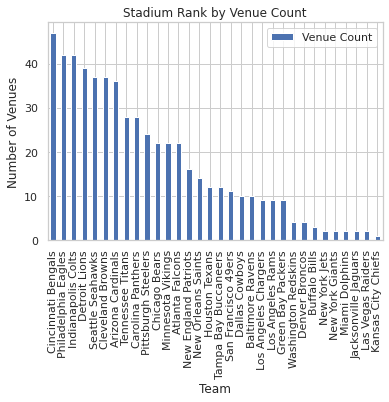

In [143]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)



ranking_venuecount = rankings[['Team','Venue Count']]
ranking_venuecount.set_index('Team', inplace= True)
ranking_venuecount.sort_values(by=['Venue Count'], ascending = False, inplace=True)

ranking_venuedist = rankings[['Team','Venue Distinct']]
ranking_venuedist.set_index('Team', inplace= True)
ranking_venuedist.sort_values(by=['Venue Distinct'], ascending = False, inplace=True)

ranking_venuerate = rankings[['Team','Venue Rating Mean']]
ranking_venuerate.set_index('Team', inplace= True)
ranking_venuerate.sort_values(by=['Venue Rating Mean'], ascending = False, inplace=True)
#ranking_venuecount
#ranking_venuerate
#ranking_venuedist

ranking_venuecount.plot(kind='bar')

plt.title('Stadium Rank by Venue Count')
plt.xlabel('Team')
plt.ylabel('Number of Venues')
#ranking_venuecount

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text major ticklabel objects>)

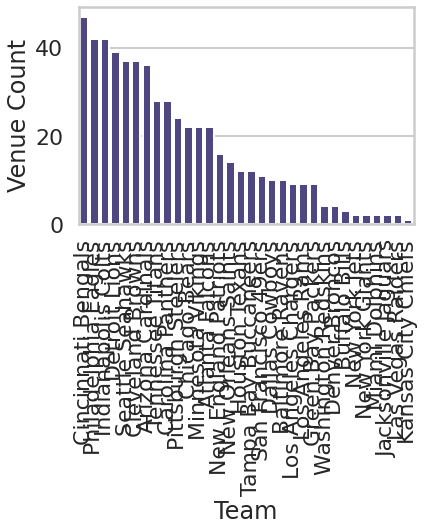

In [148]:
#tips = sns.load_dataset("ranking_venuecount")
sns.set_context('poster')
ax = sns.barplot(x="Team", y="Venue Count", color='darkslateblue',data=ranking_venuecount.reset_index())
plt.xticks(rotation=90)

Text(0, 0.5, 'Number of Venue Types')

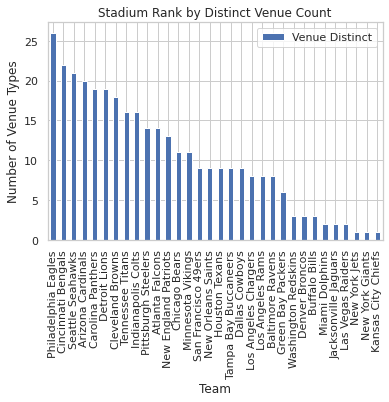

In [145]:
ranking_venuedist.plot(kind='bar')

plt.title('Stadium Rank by Distinct Venue Count')
plt.xlabel('Team')
plt.ylabel('Number of Venue Types')

Text(0, 0.5, 'Average Venue Rating')

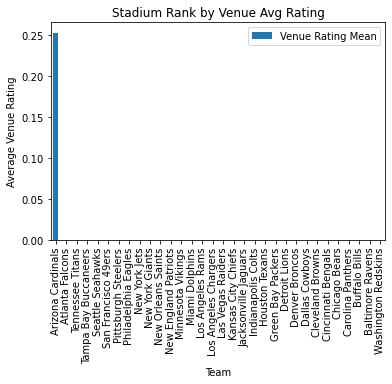

In [126]:
ranking_venuerate.plot(kind='bar')

plt.title('Stadium Rank by Venue Avg Rating')
plt.xlabel('Team')
plt.ylabel('Average Venue Rating')